In [1]:
from ROOT import *
from pmssm import PMSSM, particleDrawConfig_TeV

Welcome to JupyROOT 6.30/04


In [2]:
root_file_path = "pmssmtree_11aug2023.root"
tree_name = "mcmc"
outdir = "plotsdm"

In [3]:
root_file = TFile(root_file_path) # type: ignore
intree = root_file.Get(tree_name)

In [4]:
pmssm_plotter = PMSSM(
    intree = intree, 
    outdir = outdir,
    particleDrawConfig= particleDrawConfig_TeV,
    canvasStyle = {
                    "energy" : "13",
                    "extraText" : "Preliminary",
                    "lumi" : "(137-139)",
                }
    )

pmssm_plotter.survivalProbability2D(drawstring = "abs(chi10):g")

pmssm_plotter.impact1D(drawstring = "abs(chi10)")

pmssm_plotter.printConfig("abs(chi10)")

particleName = "g"
analysisName = "combined"

pmssm_plotter.quantilePlots2D(drawstring="abs(chi10):"+particleName,analysis=analysisName, quantile = 0.5)
pmssm_plotter.survivalProbability2D(drawstring = "abs(chi10):"+particleName,analysis=analysisName)


pmssm_plotter.printConfig()

pmssm_plotter.setConfig(particleName=None, config={
    "unit" : "TeV",
},verbose=True)

pmssm_plotter.quantilePlots2D("abs(chi10):g",quantile=0.99)

pmssm_plotter.survivalProbability2D(drawstring = "abs(chi10):"+"g",analysis="combined")



# ["combined","cms_sus_18_004","cms_sus_21_007","atlas_susy_2018_32","atlas_susy_2018_06","cms_sus_21_006"]
for analysisName in ["combined"]:
    for particleName in ["abs(chi1pm-chi10)"]:
    
        try:
            pmssm_plotter.impact1D(drawstring=particleName,analysis=analysisName)
        except:
            print("Impact 1D failed for analysis: ",analysisName)
        try:
            pmssm_plotter.survivalProbability2D(drawstring = "abs(chi10):"+particleName,analysis=analysisName)
        except:
            print("Survival Probability 2D failed for analysis: ",analysisName)
        try:        
            pmssm_plotter.survivalProbability2D(drawstring = "abs(chi10):"+particleName,analysis=analysisName,contourSwitch=True)
        except:
            print("Survival Probability 2D with contour failed for analysis: ",analysisName)
        try:
            pmssm_plotter.quantilePlots1D(drawstring=particleName,analysis=analysisName, quantiles = {
                                                                        "0.5": {"color":kBlack},
                                                                        "0.75": {"color":kOrange},
                                                                        "0.9": {"color":kRed,"linestyle": kDashed},
                                                                        "0.99": {"color":kMagenta,"linestyle": kDashed}})
        except:
            print("Quantile plots 1D failed for analysis: ",analysisName)
            
        try:
            pmssm_plotter.quantilePlots2D(drawstring="abs(chi10):"+particleName,analysis=analysisName, quantile = 0.5)
            pmssm_plotter.quantilePlots2D(drawstring="abs(chi10):"+particleName,analysis=analysisName, quantile = 0.75)
            pmssm_plotter.quantilePlots2D(drawstring="abs(chi10):"+particleName,analysis=analysisName, quantile = 0.9)
            pmssm_plotter.quantilePlots2D(drawstring="abs(chi10):"+particleName,analysis=analysisName, quantile = 0.99)

        except:
            print("Quantile plots 2D failed for analysis: ",analysisName)

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: pdf file plotsdm/deltaM_COMBINED_impact1D.pdf has been created
Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: pdf file plotsdm/deltaM_chi10_COMBINED_contours_survival2D.pdf has been created
Warning in <TH2F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: pdf file plotsdm/deltaM_chi10_COMBINED_contours_survival2D.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: OF UF_px (Potential m

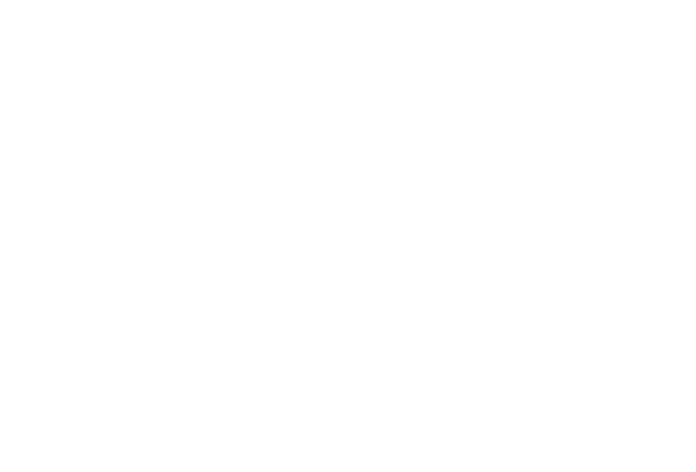

In [5]:

# ["combined","cms_sus_18_004","cms_sus_21_007","atlas_susy_2018_32","atlas_susy_2018_06","cms_sus_21_006"]
for analysisName in ["combined"]:
    # for particleName in ["g","b1","t1","t2","lcsp","abs(chi1pm-chi10)","abs(chi10)","abs(chi1pm)","abs(chi20-chi10)"]:
    for particleName in ["abs(chi1pm-chi10)"]:
        for yparticleName in ["abs(chi10)","abs(chi1pm-chi10)","abs(chi20-chi10)"]:

            righttop = {
                "legend": {
                    "x1":0.64,
                    "y1":0.78,
                    "x2":0.81,
                    "y2":0.9,
                    "textSize":0.025
                }
            }
            
            rightbottom = {
                "legend": {
                    "x1":0.74,
                    "y1":0.18,
                    "x2":0.91,
                    "y2":0.3,
                    "textSize":0.025
                }
            }
            
            
            try:
                
                if (particleName in ["abs(chi10)","abs(chi1pm)","abs(chi1pm-chi10)"]):
                    righttop["offset"] = {
                        "ymax" : 0.005
                    }
                
                if particleName in ["abs(chi1pm-chi10)","abs(chi10)","abs(chi1pm)"]:
                    pmssm_plotter.impact1D(drawstring=particleName,analysis=analysisName, canvasStyle = righttop)
                else:
                    pmssm_plotter.impact1D(drawstring=particleName,analysis=analysisName)
            except:
                print("Impact 1D failed for analysis: ",analysisName)
                
                
            try:
                
                if particleName != "abs(chi10)":
                    pmssm_plotter.survivalProbability2D(drawstring = yparticleName+":"+particleName,analysis=analysisName)
            except:
                print("Survival Probability 2D failed for analysis: ",analysisName)
            try:
                if particleName != "abs(chi10)":
                    pmssm_plotter.survivalProbability2D(drawstring = yparticleName+":"+particleName,analysis=analysisName,contourSwitch=True)
            except:
                print("Survival Probability 2D with contour failed for analysis: ",analysisName)
            try:
                if particleName == "abs(chi1pm)":
                    pmssm_plotter.quantilePlots1D(drawstring=particleName,analysis=analysisName, canvasStyle = righttop)
                elif particleName == "abs(chi10)":
                    pmssm_plotter.quantilePlots1D(drawstring=particleName,analysis=analysisName, canvasStyle = rightbottom)
                elif particleName == "abs(chi1pm-chi10)":
                    pmssm_plotter.quantilePlots1D(
                        drawstring=particleName,
                        analysis=analysisName,
                        canvasStyle = righttop,
                        xaxisDrawConfig={"logScale":True,"1Dlogy":True},canvasConfig={"offset":{"ymax":5}})
                else:
                    pmssm_plotter.quantilePlots1D(drawstring=particleName,analysis=analysisName, quantiles = {
                                                                                "0.5": {"color":kBlack},
                                                                                "0.75": {"color":kOrange},
                                                                                "0.9": {"color":kRed,"linestyle": kDashed},
                                                                                "0.99": {"color":kMagenta,"linestyle": kDashed}})
            except:
                print("Quantile plots 1D failed for analysis: ",analysisName)
                
            try:
                if particleName != "abs(chi10)":
                    if particleName == "abs(chi1pm-chi10)":
                        pmssm_plotter.quantilePlots2D(drawstring=particleName+":"+yparticleName,analysis=analysisName, quantile = 0.5, canvasStyle={"legend" :{"textColor":kWhite}})
                        pmssm_plotter.quantilePlots2D(drawstring=particleName+":"+yparticleName,analysis=analysisName, quantile = 0.75, canvasStyle={"legend" :{"textColor":kWhite}})
                        pmssm_plotter.quantilePlots2D(drawstring=particleName+":"+yparticleName,analysis=analysisName, quantile = 0.9, canvasStyle={"legend" :{"textColor":kWhite}})
                        pmssm_plotter.quantilePlots2D(drawstring=particleName+":"+yparticleName,analysis=analysisName, quantile = 0.99, canvasStyle={"legend" :{"textColor":kWhite}})
                    else:
                        pmssm_plotter.quantilePlots2D(drawstring=yparticleName+":"+particleName,analysis=analysisName, quantile = 0.5)
                        pmssm_plotter.quantilePlots2D(drawstring=yparticleName+":"+particleName,analysis=analysisName, quantile = 0.75)
                        pmssm_plotter.quantilePlots2D(drawstring=yparticleName+":"+particleName,analysis=analysisName, quantile = 0.9)
                        pmssm_plotter.quantilePlots2D(drawstring=yparticleName+":"+particleName,analysis=analysisName, quantile = 0.99)


            except:
                print("Quantile plots 2D failed for analysis: ",analysisName)